In [1]:
import pandas as pd
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
vehicle_emission_data = pd.read_csv('vehicle-emmission.csv')


In [3]:
X = vehicle_emission_data[['Cylinders', 'Fuel Type', 'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']]


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
som_grid_size = (5, 5)


In [6]:
som = MiniSom(som_grid_size[0], som_grid_size[1], input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 100)


In [7]:
bmu_coordinates = np.array([som.winner(x) for x in X_scaled])
bmu_indices = np.ravel_multi_index(bmu_coordinates.T, som_grid_size)


In [8]:
vehicle_emission_data['Cluster'] = bmu_indices


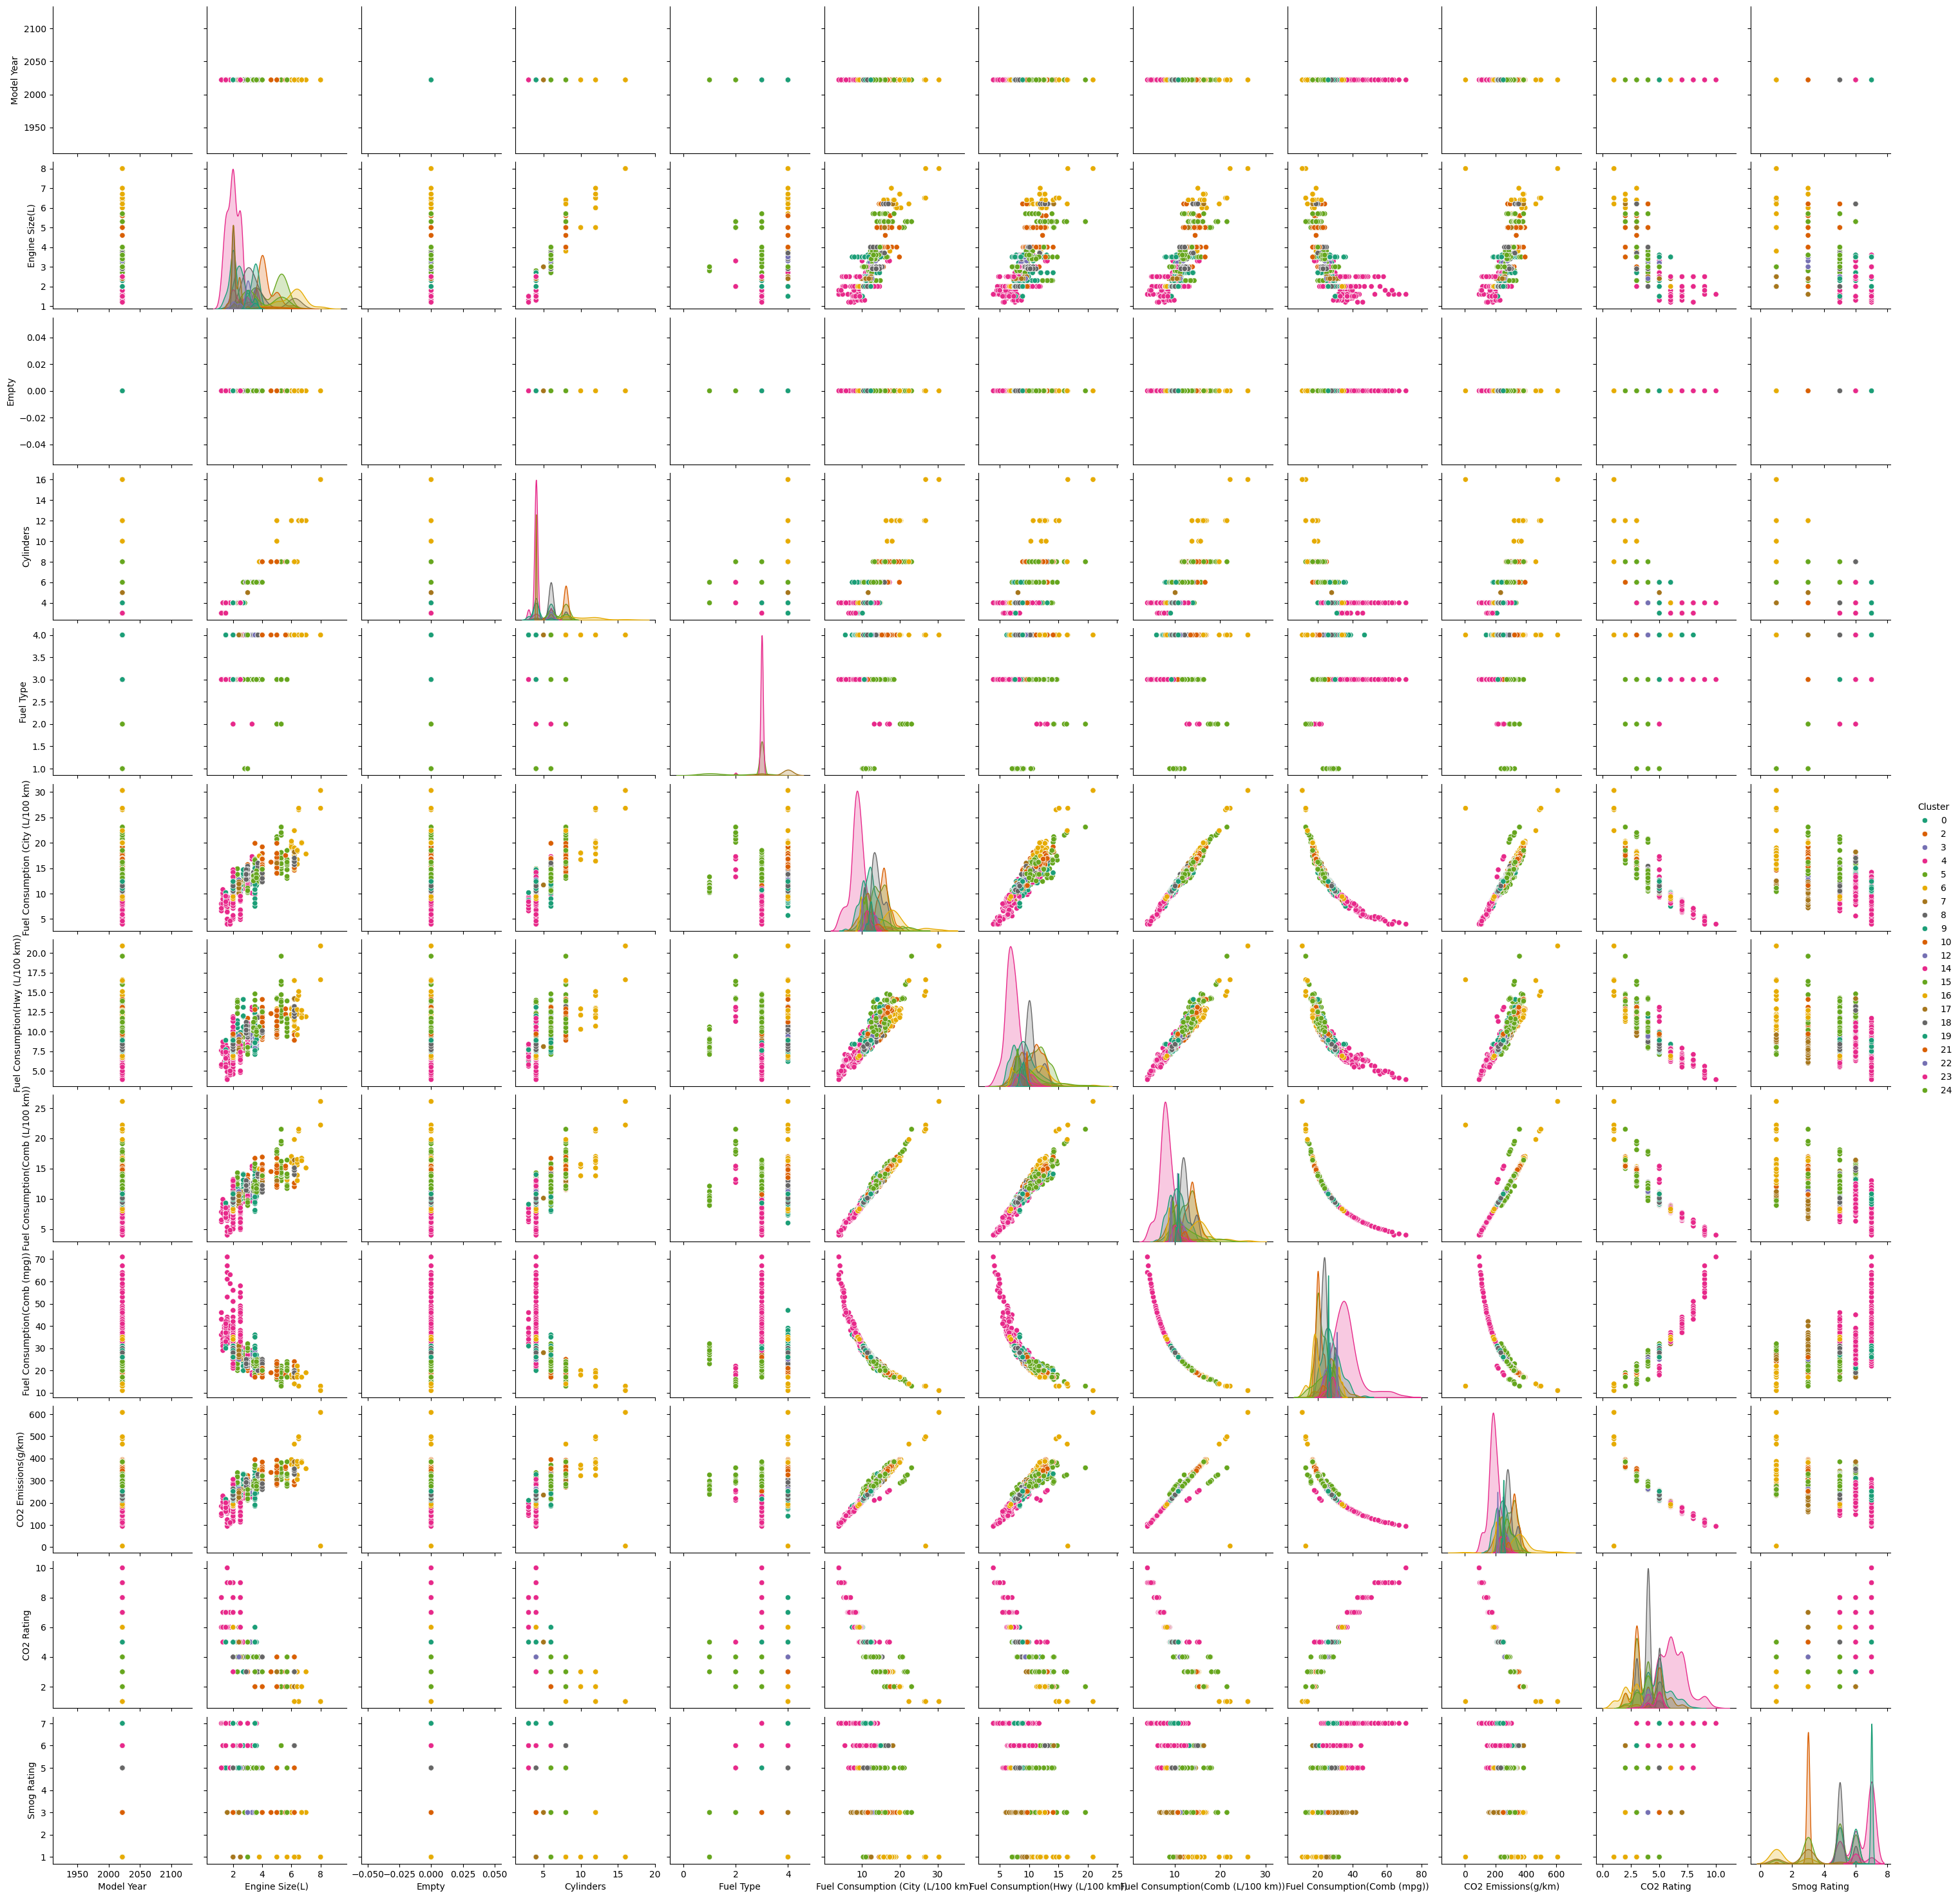

In [9]:
sns.pairplot(vehicle_emission_data, hue='Cluster', palette='Dark2')
plt.show()
